In [1]:
import numpy as np
import pandas as pd
import os
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud 
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import stop_words
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def get_us_sessions(ses_names):
    """
    Given a list of session names, gets all the speeches
    by US delegation and the associated years and 
    saves into two lists
    """
    path = os.getcwd()  
    usa_sessions = []
    years = []
    for session in ses_names:
        f_path = os.path.join(path,session)
        years.append(int(f_path[-4:]))
        files = os.listdir(f_path)
        for file in files:
             if file.startswith('USA'):
                with open(os.path.join(f_path,file), 'r', encoding='utf-8') as f:
                    usa_sessions.append(f.read())
                break

    return usa_sessions, years 

In [232]:
ses_names = [filename for filename in os.listdir() if filename.startswith('Session')]
ses_names[:5]

['Session 29 - 1974',
 'Session 50 - 1995',
 'Session 64 - 2009',
 'Session 51 - 1996',
 'Session 27 - 1972']

In [6]:
us_sessions, years = get_us_sessions(ses_names)

## TFIDF ON US Speeches

In [240]:
un_stop_words = ['international','organization', 'general',
                 'assembly', 'year', 'government', 'session',
                 'united', 'nations', 'world', 'countries',
                 'country', 'state','states', 'human', 'people', 
                 'community']

st_words = list(stop_words.ENGLISH_STOP_WORDS) + un_stop_words
tfidf = TfidfVectorizer(stop_words=st_words)
X = tfidf.fit_transform(us_sessions)
feature_names= tfidf.get_feature_names()

In [237]:
def compute_tfidf_scores(doc):
    """
    Given a document, computes the tfidf matrix for
    that document and returns  a list of 30 words with the highest
    tfidf scores in descending order of importance.
    """
    y=tfidf.transform([doc])
    scores=[]
    for col in y.nonzero()[1]:
        scores.append((feature_names[col], float((y[0, col]))))

    sorted_scores = sorted(scores, key=lambda x: x[1],
                           reverse = True)
    num_words = 30
    top_words = []
    
    for i in range(num_words):
        top_words.append(sorted_scores[i][0])

    return top_words   
    

In [238]:
top_words = []
for ses in us_sessions:
    top_words.append(compute_tfidf_scores(ses))

In [215]:
def filter_digits(list):
    """
    Given as list of words, filter out
    numbers
    """
    reg = re.compile('^\d+')
    new_list = []
    for e in list:
        if not reg.match(e):
            new_list.append(e)
            
    return new_list[:20]

In [ ]:
def create_df(ll_words):
    """
    Given a nested list of most important words,
    create a dataframe to display results for 
    each year
    """
    df = pd.DataFrame()

    min_year = min(years)
    max_year = max(years)
    for i in range(min_year, max_year + 1):
        col = str(i)
        idx = years.index(i)
        df[col] = ll_words[idx]

    return df 

In [ ]:
filtered_words = []
for ses in all_top_words: 
    filtered_words.append(filter_digits(ses))
    
df = create_df(filtered_words)

In [217]:
df.iloc[:5,:].T

,0,1,2,3,4
1970,development,program,fifth,charter,peacekeeping
1971,china,republic,agreement,canal,representation
1972,conference,extradite,acts,settlement,air
1973,shall,peace,keeping,spirit,blocs
1974,nuclear,producers,food,economic,poor
1975,peace,operation,nuclear,armistice,agreement
1976,operation,nuclear,conference,peace,korea
1977,nuclear,peace,weapons,arms,restraint
1978,economic,david,negotiations,camp,committee
1979,energy,oil,economic,food,development


## USA Word Cloud

In [229]:
def create_w_cloud(doc):
    wc = WordCloud(
        stopwords = st_words, 
        min_font_size = 10,
        background_color ='white').generate(doc)
    plt.figure(figsize = (8, 8)) 
    plt.imshow(wc) 
    plt.axis("off")
    plt.tight_layout(pad=0) 
    plt.show() 

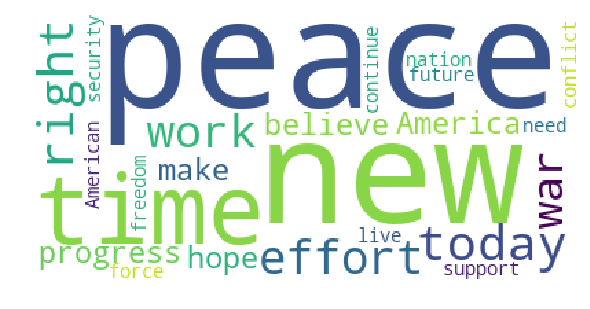

In [230]:
create_w_cloud('.'.join(us_sessions)) # Wordcloud of the most frequency used words in all US sessions